# Install nilearn for study

In [1]:
!pip install -U nilearn
!pip install -U yellowbrick

    100% |████████████████████████████████| 901kB 6.6MB/s 
    100% |████████████████████████████████| 4.2MB 10.1MB/s 
  Running setup.py bdist_wheel for nilearn ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/ee/09/3c/6ddb63159d6377d2c1587e6b4d58a6456da4550c2248583ffc
  Running setup.py bdist_wheel for nibabel ... - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/46/50/8d/bcb0b8f7c030da5bac1752fbe9cc375cbf5725fa93ba79ad84
Successfully built nilearn nibabel
    100% |████████████████████████████████| 225kB 4.1MB/s 
Requirement not upgraded as not directly required: scikit-learn>=0.19 in /usr/local/lib/python3.6/dist-packages (from yellowbrick) (0.19.1)
Requirement not upgraded as not directly required: matplotlib>=1.5.1 in /usr/local/lib/python3.6/dist-packages (from yellowbrick) (2.1.2)
Requirement not upgraded as not directly required: scipy>=0.19 in /usr/local/lib/python3.6/dist-packages (from yellowbrick) (0.19.1)
Requirem

# Import necessary libraries

In [2]:
import warnings

import numpy as np
from scipy import stats
from sklearn.decomposition import FastICA

from nilearn.datasets import fetch_neurovault
from nilearn.image import smooth_img

from nilearn.datasets import load_mni152_brain_mask
from nilearn.input_data import NiftiMasker

from nilearn import plotting

/usr/local/lib/python3.6/dist-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87, in catch_config_e

# Download Neurovault dataset

I have set the parameter for max_images to 1200 since it was taking a long time to download. Maybe look somewhere else for running the code.

In [3]:
print("Fetching Neurovault images; "
      "if you haven't downloaded any Neurovault data before "
      "this will take several minutes.")


Fetching Neurovault images; if you haven't downloaded any Neurovault data before this will take several minutes.


In [0]:
from nilearn.image import smooth_img

from nilearn.datasets import load_mni152_brain_mask
from nilearn.input_data import NiftiMasker

from nilearn import plotting

# Mask images

Conduct masking on mni-152 brain mask to convert the Nifti-image format to a 2d Numpy array. Code is taken from the example here-[ICA-Neurovault](http://nilearn.github.io/auto_examples/05_advanced/plot_ica_neurovault.html#sphx-glr-auto-examples-05-advanced-plot-ica-neurovault-py)

In [0]:
nv_data = fetch_neurovault(max_images=600, fetch_neurosynth_words=True)


Dataset created in /content/nilearn_data/neurovault

Reading local neurovault data.
No image found on local disk.
Reading server neurovault data.
Scroll collections: getting new batch: http://neurovault.org/api/collections/?limit=100&offset=0
Scroll collections: batch size: 100
Scroll images from collection 921: getting new batch: http://neurovault.org/api/collections/921/images/?limit=100&offset=0
Scroll images from collection 921: batch size: 1
On neurovault.org: no image matched query in collection 921
Scroll images from collection 35: getting new batch: http://neurovault.org/api/collections/35/images/?limit=100&offset=0
Scroll images from collection 35: batch size: 4
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_35/image_110.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=110
Could not fetch words for image 110
Already fetched 1 image


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_35/image_111.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=111
Could not fetch words for image 111
Already fetched 2 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_35/image_112.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=112
Could not fetch words for image 112
Already fetched 3 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_35/image_113.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=113
Could not fetch words for image 113
Already fetched 4 images
On neurovault.org: 4 images matched query in collection 35
Scroll images from collection 440: getting new batch: http://neurovault.org/api/collections/440/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 440: batch size: 2
On neurovault.org: no image matched query in collection 440
Scroll images from collection 496: getting new batch: http://neurovault.org/api/collections/496/images/?limit=100&offset=0
Scroll images from collection 496: batch size: 1
On neurovault.org: no image matched query in collection 496
Scroll images from collection 1054: getting new batch: http://neurovault.org/api/collections/1054/images/?limit=100&offset=0
Scroll images from collection 1054: batch size: 40
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14181.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14181
Could not fetch words for image 14181
Already fetched 5 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14182.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14182
Could not fetch words for image 14182
Already fetched 6 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14183.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14183
Could not fetch words for image 14183
Already fetched 7 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14184.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14184
Could not fetch words for image 14184
Already fetched 8 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14185.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14185
Could not fetch words for image 14185
Already fetched 9 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14186.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14186
Could not fetch words for image 14186
Already fetched 10 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14187.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14187
Could not fetch words for image 14187
Already fetched 11 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14188.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14188
Could not fetch words for image 14188
Already fetched 12 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14189.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14189
Could not fetch words for image 14189
Already fetched 13 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14190.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14190
Could not fetch words for image 14190
Already fetched 14 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14191.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14191
Could not fetch words for image 14191
Already fetched 15 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14192.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14192
Could not fetch words for image 14192
Already fetched 16 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14193.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14193
Could not fetch words for image 14193
Already fetched 17 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14194.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14194
Could not fetch words for image 14194
Already fetched 18 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14195.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14195
Could not fetch words for image 14195
Already fetched 19 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14196.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14196
Could not fetch words for image 14196
Already fetched 20 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14197.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14197
Could not fetch words for image 14197
Already fetched 21 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14198.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14198
Could not fetch words for image 14198
Already fetched 22 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14199.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14199
Could not fetch words for image 14199
Already fetched 23 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14200.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14200
Could not fetch words for image 14200
Already fetched 24 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14201.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14201
Could not fetch words for image 14201
Already fetched 25 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14202.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14202
Could not fetch words for image 14202
Already fetched 26 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14203.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14203
Could not fetch words for image 14203
Already fetched 27 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14204.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14204
Could not fetch words for image 14204
Already fetched 28 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14205.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14205
Could not fetch words for image 14205
Already fetched 29 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14206.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14206
Could not fetch words for image 14206
Already fetched 30 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14207.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14207
Could not fetch words for image 14207
Already fetched 31 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14208.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14208
Could not fetch words for image 14208
Already fetched 32 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14209.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14209
Could not fetch words for image 14209
Already fetched 33 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14210.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14210
Could not fetch words for image 14210
Already fetched 34 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14211.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14211
Could not fetch words for image 14211
Already fetched 35 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14212.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14212
Could not fetch words for image 14212
Already fetched 36 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14213.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14213
Could not fetch words for image 14213
Already fetched 37 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14214.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14214
Could not fetch words for image 14214
Already fetched 38 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14215.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14215
Could not fetch words for image 14215
Already fetched 39 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14216.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14216
Could not fetch words for image 14216
Already fetched 40 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14217.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14217
Could not fetch words for image 14217
Already fetched 41 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14218.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14218
Could not fetch words for image 14218
Already fetched 42 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14219.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14219
Could not fetch words for image 14219
Already fetched 43 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14220.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14220
Could not fetch words for image 14220
Already fetched 44 images
On neurovault.org: 40 images matched query in collection 1054
Scroll images from collection 4: getting new batch: http://neurovault.org/api/collections/4/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 4: batch size: 1
On neurovault.org: no image matched query in collection 4
Scroll images from collection 79: getting new batch: http://neurovault.org/api/collections/79/images/?limit=100&offset=0
Scroll images from collection 79: batch size: 5
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_79/image_11020.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=11020
Could not fetch words for image 11020
Already fetched 45 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_79/image_11021.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=11021
Could not fetch words for image 11021
Already fetched 46 images
On neurovault.org: 2 images matched query in collection 79
Scroll images from collection 1257: getting new batch: http://neurovault.org/api/collections/1257/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 1257: batch size: 100
Scroll images from collection 1257: getting new batch: http://neurovault.org/api/collections/1257/images/?limit=100&offset=100
Scroll images from collection 1257: batch size: 100
Scroll images from collection 1257: getting new batch: http://neurovault.org/api/collections/1257/images/?limit=100&offset=200
Scroll images from collection 1257: batch size: 100
Scroll images from collection 1257: getting new batch: http://neurovault.org/api/collections/1257/images/?limit=100&offset=300
Scroll images from collection 1257: batch size: 100
Scroll images from collection 1257: getting new batch: http://neurovault.org/api/collections/1257/images/?limit=100&offset=400
Scroll images from collection 1257: batch size: 100
Scroll images from collection 1257: getting new batch: http://neurovault.org/api/collections/1257/images/?limit=100&offset=500
Scroll images from collection 1257: batch size: 100
Scroll images from collection 1257: getting new batch

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 1962: batch size: 1
On neurovault.org: no image matched query in collection 1962
Scroll images from collection 1284: getting new batch: http://neurovault.org/api/collections/1284/images/?limit=100&offset=0
Scroll images from collection 1284: batch size: 2
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1284/image_18787.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=18787
Could not fetch words for image 18787
Already fetched 48 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1284/image_18788.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=18788
Could not fetch words for image 18788
Already fetched 49 images
On neurovault.org: 2 images matched query in collection 1284
Scroll images from collection 1407: getting new batch: http://neurovault.org/api/collections/1407/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 1407: batch size: 2
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1407/image_20731.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=20731
Could not fetch words for image 20731
Already fetched 50 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1407/image_20732.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=20732
Could not fetch words for image 20732
Already fetched 51 images
On neurovault.org: 2 images matched query in collection 1407
Scroll images from collection 215: getting new batch: http://neurovault.org/api/collections/215/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 215: batch size: 1
On neurovault.org: no image matched query in collection 215
Scroll images from collection 1194: getting new batch: http://neurovault.org/api/collections/1194/images/?limit=100&offset=0
Scroll images from collection 1194: batch size: 2
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1194/image_16252.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=16252
Could not fetch words for image 16252
Already fetched 52 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1194/image_16253.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=16253
Could not fetch words for image 16253
Already fetched 53 images
On neurovault.org: 2 images matched query in collection 1194
Scroll images from collection 89: getting new batch: http://neurovault.org/api/collections/89/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 89: batch size: 1
On neurovault.org: no image matched query in collection 89
Scroll images from collection 3844: getting new batch: http://neurovault.org/api/collections/3844/images/?limit=100&offset=0
Scroll images from collection 3844: batch size: 1
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_3844/image_64281.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=64281
Could not fetch words for image 64281
Already fetched 54 images
On neurovault.org: 1 image matched query in collection 3844
Scroll images from collection 103: getting new batch: http://neurovault.org/api/collections/103/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 103: batch size: 2
On neurovault.org: no image matched query in collection 103
Scroll images from collection 612: getting new batch: http://neurovault.org/api/collections/612/images/?limit=100&offset=0
Scroll images from collection 612: batch size: 1
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_612/image_9884.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=9884
Could not fetch words for image 9884
Already fetched 55 images
On neurovault.org: 1 image matched query in collection 612
Scroll images from collection 1103: getting new batch: http://neurovault.org/api/collections/1103/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 1103: batch size: 4
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1103/image_14936.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14936
Could not fetch words for image 14936
Already fetched 56 images
On neurovault.org: 1 image matched query in collection 1103
Scroll images from collection 1831: getting new batch: http://neurovault.org/api/collections/1831/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 1831: batch size: 1
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1831/image_28471.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=28471
Could not fetch words for image 28471
Already fetched 57 images
On neurovault.org: 1 image matched query in collection 1831
Scroll images from collection 115: getting new batch: http://neurovault.org/api/collections/115/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 115: batch size: 11
On neurovault.org: no image matched query in collection 115
Scroll images from collection 118: getting new batch: http://neurovault.org/api/collections/118/images/?limit=100&offset=0
Scroll images from collection 118: batch size: 1
On neurovault.org: no image matched query in collection 118
Scroll images from collection 1803: getting new batch: http://neurovault.org/api/collections/1803/images/?limit=100&offset=0
Scroll images from collection 1803: batch size: 31
On neurovault.org: no image matched query in collection 1803
Scroll images from collection 2323: getting new batch: http://neurovault.org/api/collections/2323/images/?limit=100&offset=0
Scroll images from collection 2323: batch size: 4
On neurovault.org: no image matched query in collection 2323
Scroll images from collection 1056: getting new batch: http://neurovault.org/api/collections/1056/images/?limit=100&offset=0
Scroll images from collection 1056: batch size: 20
On neurov

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14085.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14085
Could not fetch words for image 14085
Already fetched 59 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14086.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14086
Could not fetch words for image 14086
Already fetched 60 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14087.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14087
Could not fetch words for image 14087
Already fetched 61 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14088.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14088
Could not fetch words for image 14088
Already fetched 62 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14089.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14089
Could not fetch words for image 14089
Already fetched 63 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14090.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14090
Could not fetch words for image 14090
Already fetched 64 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14091.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14091
Could not fetch words for image 14091
Already fetched 65 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14092.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14092
Could not fetch words for image 14092
Already fetched 66 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14093.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14093
Could not fetch words for image 14093
Already fetched 67 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14094.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14094
Could not fetch words for image 14094
Already fetched 68 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14095.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14095
Could not fetch words for image 14095
Already fetched 69 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14096.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14096
Could not fetch words for image 14096
Already fetched 70 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14097.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14097
Could not fetch words for image 14097
Already fetched 71 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14098.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14098
Could not fetch words for image 14098
Already fetched 72 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14099.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14099
Could not fetch words for image 14099
Already fetched 73 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14100.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14100
Could not fetch words for image 14100
Already fetched 74 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14101.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14101
Could not fetch words for image 14101
Already fetched 75 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14102.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14102
Could not fetch words for image 14102
Already fetched 76 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14103.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14103
Could not fetch words for image 14103
Already fetched 77 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14104.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14104
Could not fetch words for image 14104
Already fetched 78 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14105.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14105
Could not fetch words for image 14105
Already fetched 79 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14106.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14106
Could not fetch words for image 14106
Already fetched 80 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14107.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14107
Could not fetch words for image 14107
Already fetched 81 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14109.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14109
Could not fetch words for image 14109
Already fetched 82 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14110.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14110
Could not fetch words for image 14110
Already fetched 83 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14111.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14111
Could not fetch words for image 14111
Already fetched 84 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14113.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14113
Could not fetch words for image 14113
Already fetched 85 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14114.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14114
Could not fetch words for image 14114
Already fetched 86 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14115.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14115
Could not fetch words for image 14115
Already fetched 87 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14116.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14116
Could not fetch words for image 14116
Already fetched 88 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14117.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14117
Could not fetch words for image 14117
Already fetched 89 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14118.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14118
Could not fetch words for image 14118
Already fetched 90 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14119.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14119
Could not fetch words for image 14119
Already fetched 91 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14120.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14120
Could not fetch words for image 14120
Already fetched 92 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14121.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14121
Could not fetch words for image 14121
Already fetched 93 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14122.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14122
Could not fetch words for image 14122
Already fetched 94 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14124.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=14124
Could not fetch words for image 14124
Already fetched 95 images
On neurovault.org: 38 images matched query in collection 1039
Scroll images from collection 866: getting new batch: http://neurovault.org/api/collections/866/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 866: batch size: 70
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12579.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12579
Could not fetch words for image 12579
Already fetched 96 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12580.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12580
Could not fetch words for image 12580
Already fetched 97 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12581.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12581
Could not fetch words for image 12581
Already fetched 98 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12582.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12582
Could not fetch words for image 12582
Already fetched 99 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12583.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12583
Could not fetch words for image 12583
Already fetched 100 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12584.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12584
Could not fetch words for image 12584
Already fetched 101 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12585.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12585
Could not fetch words for image 12585
Already fetched 102 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12586.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12586
Could not fetch words for image 12586
Already fetched 103 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12587.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12587
Could not fetch words for image 12587
Already fetched 104 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12588.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12588
Could not fetch words for image 12588
Already fetched 105 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12589.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12589
Could not fetch words for image 12589
Already fetched 106 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12590.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12590
Could not fetch words for image 12590
Already fetched 107 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12591.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12591
Could not fetch words for image 12591
Already fetched 108 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12592.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12592
Could not fetch words for image 12592
Already fetched 109 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12593.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12593
Could not fetch words for image 12593
Already fetched 110 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12594.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12594
Could not fetch words for image 12594
Already fetched 111 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12595.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12595
Could not fetch words for image 12595
Already fetched 112 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12596.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12596
Could not fetch words for image 12596
Already fetched 113 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12597.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12597
Could not fetch words for image 12597
Already fetched 114 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12598.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12598
Could not fetch words for image 12598
Already fetched 115 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12599.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12599
Could not fetch words for image 12599
Already fetched 116 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12600.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12600
Could not fetch words for image 12600
Already fetched 117 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12601.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12601
Could not fetch words for image 12601
Already fetched 118 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12602.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12602
Could not fetch words for image 12602
Already fetched 119 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12603.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12603
Could not fetch words for image 12603
Already fetched 120 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12604.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12604
Could not fetch words for image 12604
Already fetched 121 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12605.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12605
Could not fetch words for image 12605
Already fetched 122 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12606.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12606
Could not fetch words for image 12606
Already fetched 123 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12607.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12607
Could not fetch words for image 12607
Already fetched 124 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12608.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12608
Could not fetch words for image 12608
Already fetched 125 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12609.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12609
Could not fetch words for image 12609
Already fetched 126 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12610.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12610
Could not fetch words for image 12610
Already fetched 127 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12611.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12611
Could not fetch words for image 12611
Already fetched 128 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12612.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12612
Could not fetch words for image 12612
Already fetched 129 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12613.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12613
Could not fetch words for image 12613
Already fetched 130 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12614.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12614
Could not fetch words for image 12614
Already fetched 131 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12615.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12615
Could not fetch words for image 12615
Already fetched 132 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12616.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12616
Could not fetch words for image 12616
Already fetched 133 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12617.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12617
Could not fetch words for image 12617
Already fetched 134 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12618.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12618
Could not fetch words for image 12618
Already fetched 135 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12619.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12619
Could not fetch words for image 12619
Already fetched 136 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12620.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12620
Could not fetch words for image 12620
Already fetched 137 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12621.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12621
Could not fetch words for image 12621
Already fetched 138 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12622.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12622
Could not fetch words for image 12622
Already fetched 139 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12623.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12623
Could not fetch words for image 12623
Already fetched 140 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12624.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12624
Could not fetch words for image 12624
Already fetched 141 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12625.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12625
Could not fetch words for image 12625
Already fetched 142 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12626.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12626
Could not fetch words for image 12626
Already fetched 143 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12627.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12627
Could not fetch words for image 12627
Already fetched 144 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12628.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12628
Could not fetch words for image 12628
Already fetched 145 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12629.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12629
Could not fetch words for image 12629
Already fetched 146 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12630.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12630
Could not fetch words for image 12630
Already fetched 147 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12631.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12631
Could not fetch words for image 12631
Already fetched 148 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12632.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12632
Could not fetch words for image 12632
Already fetched 149 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12633.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12633
Could not fetch words for image 12633
Already fetched 150 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12634.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12634
Could not fetch words for image 12634
Already fetched 151 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12635.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12635
Could not fetch words for image 12635
Already fetched 152 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12636.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12636
Could not fetch words for image 12636
Already fetched 153 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12637.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12637
Could not fetch words for image 12637
Already fetched 154 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12638.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12638
Could not fetch words for image 12638
Already fetched 155 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12639.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12639
Could not fetch words for image 12639
Already fetched 156 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12640.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12640
Could not fetch words for image 12640
Already fetched 157 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12641.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12641
Could not fetch words for image 12641
Already fetched 158 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12642.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12642
Could not fetch words for image 12642
Already fetched 159 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12643.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12643
Could not fetch words for image 12643
Already fetched 160 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12644.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12644
Could not fetch words for image 12644
Already fetched 161 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12645.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12645
Could not fetch words for image 12645
Already fetched 162 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12646.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12646
Could not fetch words for image 12646
Already fetched 163 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12647.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12647
Could not fetch words for image 12647
Already fetched 164 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_866/image_12648.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=12648
Could not fetch words for image 12648
Already fetched 165 images
On neurovault.org: 70 images matched query in collection 866
Scroll images from collection 495: getting new batch: http://neurovault.org/api/collections/495/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 495: batch size: 2
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_495/image_9543.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=9543
Could not fetch words for image 9543
Already fetched 166 images
On neurovault.org: 1 image matched query in collection 495
Scroll images from collection 140: getting new batch: http://neurovault.org/api/collections/140/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 140: batch size: 1
On neurovault.org: no image matched query in collection 140
Scroll images from collection 2696: getting new batch: http://neurovault.org/api/collections/2696/images/?limit=100&offset=0
Scroll images from collection 2696: batch size: 100
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51629.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51629
Could not fetch words for image 51629
Already fetched 167 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51631.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51631
Could not fetch words for image 51631
Already fetched 168 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51633.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51633
Could not fetch words for image 51633
Already fetched 169 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51635.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51635
Could not fetch words for image 51635
Already fetched 170 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51637.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51637
Could not fetch words for image 51637
Already fetched 171 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51639.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51639
Could not fetch words for image 51639
Already fetched 172 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51641.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51641
Could not fetch words for image 51641
Already fetched 173 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51643.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51643
Could not fetch words for image 51643
Already fetched 174 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51645.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51645
Could not fetch words for image 51645
Already fetched 175 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51647.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51647
Could not fetch words for image 51647
Already fetched 176 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51649.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51649
Could not fetch words for image 51649
Already fetched 177 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51651.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51651
Could not fetch words for image 51651
Already fetched 178 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51653.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51653
Could not fetch words for image 51653
Already fetched 179 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51655.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51655
Could not fetch words for image 51655
Already fetched 180 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51657.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51657
Could not fetch words for image 51657
Already fetched 181 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51659.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51659
Could not fetch words for image 51659
Already fetched 182 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51661.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51661
Could not fetch words for image 51661
Already fetched 183 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51663.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51663
Could not fetch words for image 51663
Already fetched 184 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51665.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51665
Could not fetch words for image 51665
Already fetched 185 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51667.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51667
Could not fetch words for image 51667
Already fetched 186 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51669.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51669
Could not fetch words for image 51669
Already fetched 187 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51671.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51671
Could not fetch words for image 51671
Already fetched 188 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51673.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51673
Could not fetch words for image 51673
Already fetched 189 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51675.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51675
Could not fetch words for image 51675
Already fetched 190 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51677.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51677
Could not fetch words for image 51677
Already fetched 191 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51679.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51679
Could not fetch words for image 51679
Already fetched 192 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51681.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51681
Could not fetch words for image 51681
Already fetched 193 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51683.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51683
Could not fetch words for image 51683
Already fetched 194 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51685.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51685
Could not fetch words for image 51685
Already fetched 195 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51687.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51687
Could not fetch words for image 51687
Already fetched 196 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51689.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51689
Could not fetch words for image 51689
Already fetched 197 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51691.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51691
Could not fetch words for image 51691
Already fetched 198 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51693.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51693
Could not fetch words for image 51693
Already fetched 199 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51695.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51695
Could not fetch words for image 51695
Already fetched 200 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51697.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51697
Could not fetch words for image 51697
Already fetched 201 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51699.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51699
Could not fetch words for image 51699
Already fetched 202 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51701.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51701
Could not fetch words for image 51701
Already fetched 203 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51703.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51703
Could not fetch words for image 51703
Already fetched 204 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51705.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51705
Could not fetch words for image 51705
Already fetched 205 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51707.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51707
Could not fetch words for image 51707
Already fetched 206 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51709.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51709
Could not fetch words for image 51709
Already fetched 207 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51711.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51711
Could not fetch words for image 51711
Already fetched 208 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51713.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51713
Could not fetch words for image 51713
Already fetched 209 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51715.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51715
Could not fetch words for image 51715
Already fetched 210 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51717.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51717
Could not fetch words for image 51717
Already fetched 211 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51719.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51719
Could not fetch words for image 51719
Already fetched 212 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51721.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51721
Could not fetch words for image 51721
Already fetched 213 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51723.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51723
Could not fetch words for image 51723
Already fetched 214 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51725.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51725
Could not fetch words for image 51725
Already fetched 215 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51727.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51727
Could not fetch words for image 51727
Already fetched 216 images
Scroll images from collection 2696: getting new batch: http://neurovault.org/api/collections/2696/images/?limit=100&offset=100


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 2696: batch size: 24
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51729.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51729
Could not fetch words for image 51729
Already fetched 217 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51731.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51731
Could not fetch words for image 51731
Already fetched 218 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51733.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51733
Could not fetch words for image 51733
Already fetched 219 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51735.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51735
Could not fetch words for image 51735
Already fetched 220 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51737.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51737
Could not fetch words for image 51737
Already fetched 221 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51739.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51739
Could not fetch words for image 51739
Already fetched 222 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51741.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51741
Could not fetch words for image 51741
Already fetched 223 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51743.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51743
Could not fetch words for image 51743
Already fetched 224 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51745.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51745
Could not fetch words for image 51745
Already fetched 225 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51747.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51747
Could not fetch words for image 51747
Already fetched 226 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51749.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51749
Could not fetch words for image 51749
Already fetched 227 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2696/image_51751.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=51751
Could not fetch words for image 51751
Already fetched 228 images
On neurovault.org: 62 images matched query in collection 2696
Scroll images from collection 1195: getting new batch: http://neurovault.org/api/collections/1195/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 1195: batch size: 1
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1195/image_16254.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=16254
Could not fetch words for image 16254
Already fetched 229 images
On neurovault.org: 1 image matched query in collection 1195
Scroll images from collection 1286: getting new batch: http://neurovault.org/api/collections/1286/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 1286: batch size: 21
On neurovault.org: no image matched query in collection 1286
Scroll images from collection 1461: getting new batch: http://neurovault.org/api/collections/1461/images/?limit=100&offset=0
Scroll images from collection 1461: batch size: 1
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1461/image_23549.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=23549
Could not fetch words for image 23549
Already fetched 230 images
On neurovault.org: 1 image matched query in collection 1461
Scroll images from collection 1830: getting new batch: http://neurovault.org/api/collections/1830/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 1830: batch size: 22
On neurovault.org: no image matched query in collection 1830
Scroll images from collection 2028: getting new batch: http://neurovault.org/api/collections/2028/images/?limit=100&offset=0
Scroll images from collection 2028: batch size: 5
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2028/image_39132.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=39132
Could not fetch words for image 39132
Already fetched 231 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2028/image_39133.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=39133
Could not fetch words for image 39133
Already fetched 232 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2028/image_39134.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=39134
Could not fetch words for image 39134
Already fetched 233 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2028/image_39135.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=39135
Could not fetch words for image 39135
Already fetched 234 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_2028/image_39136.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=39136
Could not fetch words for image 39136
Already fetched 235 images
On neurovault.org: 5 images matched query in collection 2028
Scroll images from collection 3148: getting new batch: http://neurovault.org/api/collections/3148/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 3148: batch size: 1
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_3148/image_56809.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=56809
Could not fetch words for image 56809
Already fetched 236 images
On neurovault.org: 1 image matched query in collection 3148
Scroll images from collection 812: getting new batch: http://neurovault.org/api/collections/812/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 812: batch size: 1
On neurovault.org: no image matched query in collection 812
Scroll images from collection 628: getting new batch: http://neurovault.org/api/collections/628/images/?limit=100&offset=0
Scroll images from collection 628: batch size: 5
On neurovault.org: no image matched query in collection 628
Scroll images from collection 1835: getting new batch: http://neurovault.org/api/collections/1835/images/?limit=100&offset=0
Scroll images from collection 1835: batch size: 7
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1835/image_28464.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=28464
Could not fetch words for image 28464
Already fetched 237 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1835/image_29289.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=29289
Could not fetch words for image 29289
Already fetched 238 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1835/image_29307.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=29307
Could not fetch words for image 29307
Already fetched 239 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1835/image_29347.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=29347
Could not fetch words for image 29347
Already fetched 240 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1835/image_29374.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=29374
Could not fetch words for image 29374
Already fetched 241 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1835/image_29461.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=29461
Could not fetch words for image 29461
Already fetched 242 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1835/image_29688.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=29688
Could not fetch words for image 29688
Already fetched 243 images
On neurovault.org: 7 images matched query in collection 1835
Scroll collections: getting new batch: http://neurovault.org/api/collections/?limit=100&offset=100


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll collections: batch size: 100
Scroll images from collection 3645: getting new batch: http://neurovault.org/api/collections/3645/images/?limit=100&offset=0
Scroll images from collection 3645: batch size: 4
On neurovault.org: no image matched query in collection 3645
Scroll images from collection 631: getting new batch: http://neurovault.org/api/collections/631/images/?limit=100&offset=0
Scroll images from collection 631: batch size: 1
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_631/image_10026.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=10026
Could not fetch words for image 10026
Already fetched 244 images
On neurovault.org: 1 image matched query in collection 631
Scroll images from collection 907: getting new batch: http://neurovault.org/api/collections/907/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 907: batch size: 5
Problem downloading file from https://neurovault.org/media/images/907/0back%3E1back_zstat1.nii.gz
_scroll_collection: bad image: {'url': 'https://neurovault.org/images/31926/', 'id': 31926, 'file': 'https://neurovault.org/media/images/907/0back%3E1back_zstat1.nii.gz', 'collection': 'https://neurovault.org/collections/907/', 'collection_id': 907, 'file_size': 685826, 'cognitive_paradigm_cogatlas': 'n-back task', 'cognitive_paradigm_cogatlas_id': 'tsk_4a57abb949bcd', 'cognitive_contrast_cogatlas': '1-back', 'cognitive_contrast_cogatlas_id': 'cnt_4b4a5473705db', 'map_type': 'Z map', 'analysis_level': None, 'name': 'P1301_MainEffect_0back>1back', 'description': 'Unthresholded contrast for P1301. Main effect of 0back>1back. ', 'add_date': '2016-11-07T12:30:13.496378Z', 'modify_date': '2016-11-07T12:30:16.582253Z', 'is_valid': True, 'surface_left_file': None, 'surface_right_file': None, 'data_origin': 'volume', 'target_template_image': 'Generi

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: NOT FOUND

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    overw

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_907/image_31928.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=31928
Could not fetch words for image 31928
Already fetched 245 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_907/image_31929.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=31929
Could not fetch words for image 31929
Already fetched 246 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_907/image_31930.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=31930
Could not fetch words for image 31930
Already fetched 247 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Problem downloading file from https://neurovault.org/media/images/907/1bakc%3E0back_zstat1.nii.gz
_scroll_collection: bad image: {'url': 'https://neurovault.org/images/31931/', 'id': 31931, 'file': 'https://neurovault.org/media/images/907/1bakc%3E0back_zstat1.nii.gz', 'collection': 'https://neurovault.org/collections/907/', 'collection_id': 907, 'file_size': 685824, 'cognitive_paradigm_cogatlas': 'n-back task', 'cognitive_paradigm_cogatlas_id': 'tsk_4a57abb949bcd', 'cognitive_contrast_cogatlas': '1-back', 'cognitive_contrast_cogatlas_id': 'cnt_4b4a5473705db', 'map_type': 'Z map', 'analysis_level': None, 'name': 'P1301_MainEffect_1back_over_0back', 'description': 'Unthresholded contrast for P1301. Main effect of 1back>0back. ', 'add_date': '2016-11-07T12:33:11.209887Z', 'modify_date': '2016-11-07T12:34:40.464249Z', 'is_valid': True, 'surface_left_file': None, 'surface_right_file': None, 'data_origin': 'volume', 'target_template_image': 'GenericMNI', 'subject_species': 'homo sapiens', 'f

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: NOT FOUND

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    overw

Scroll images from collection 1057: batch size: 5
On neurovault.org: no image matched query in collection 1057
Scroll images from collection 1196: getting new batch: http://neurovault.org/api/collections/1196/images/?limit=100&offset=0
Scroll images from collection 1196: batch size: 1
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1196/image_16255.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=16255
Could not fetch words for image 16255
Already fetched 248 images
On neurovault.org: 1 image matched query in collection 1196
Scroll images from collection 1807: getting new batch: http://neurovault.org/api/collections/1807/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 1807: batch size: 100
Scroll images from collection 1807: getting new batch: http://neurovault.org/api/collections/1807/images/?limit=100&offset=100
Scroll images from collection 1807: batch size: 10
On neurovault.org: no image matched query in collection 1807
Scroll images from collection 1287: getting new batch: http://neurovault.org/api/collections/1287/images/?limit=100&offset=0
Scroll images from collection 1287: batch size: 1
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1287/image_18616.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=18616
Could not fetch words for image 18616
Already fetched 249 images
On neurovault.org: 1 image matched query in collection 1287
Scroll images from collection 2697: getting new batch: http://neurovault.org/api/collections/2697/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 2697: batch size: 10
On neurovault.org: no image matched query in collection 2697
Scroll images from collection 367: getting new batch: http://neurovault.org/api/collections/367/images/?limit=100&offset=0
Scroll images from collection 367: batch size: 1
On neurovault.org: no image matched query in collection 367
Scroll images from collection 320: getting new batch: http://neurovault.org/api/collections/320/images/?limit=100&offset=0
Scroll images from collection 320: batch size: 2
On neurovault.org: no image matched query in collection 320
Scroll images from collection 356: getting new batch: http://neurovault.org/api/collections/356/images/?limit=100&offset=0
Scroll images from collection 356: batch size: 1
On neurovault.org: no image matched query in collection 356
Scroll images from collection 285: getting new batch: http://neurovault.org/api/collections/285/images/?limit=100&offset=0
Scroll images from collection 285: batch size: 1
On neurovault.org: n

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Scroll images from collection 287: batch size: 1
On neurovault.org: no image matched query in collection 287
Scroll images from collection 409: getting new batch: http://neurovault.org/api/collections/409/images/?limit=100&offset=0
Scroll images from collection 409: batch size: 1
On neurovault.org: no image matched query in collection 409
Scroll images from collection 886: getting new batch: http://neurovault.org/api/collections/886/images/?limit=100&offset=0
Scroll images from collection 886: batch size: 33
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13052.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13052
Could not fetch words for image 13052
Already fetched 251 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13067.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13067
Could not fetch words for image 13067
Already fetched 252 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13068.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13068
Could not fetch words for image 13068
Already fetched 253 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13069.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13069
Could not fetch words for image 13069
Already fetched 254 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13070.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13070
Could not fetch words for image 13070
Already fetched 255 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13071.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13071
Could not fetch words for image 13071
Already fetched 256 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13072.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13072
Could not fetch words for image 13072
Already fetched 257 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13073.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13073
Could not fetch words for image 13073
Already fetched 258 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13074.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13074
Could not fetch words for image 13074
Already fetched 259 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13075.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13075
Could not fetch words for image 13075
Already fetched 260 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13076.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13076
Could not fetch words for image 13076
Already fetched 261 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13077.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13077
Could not fetch words for image 13077
Already fetched 262 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13078.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13078
Could not fetch words for image 13078
Already fetched 263 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13079.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13079
Could not fetch words for image 13079
Already fetched 264 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13080.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13080
Could not fetch words for image 13080
Already fetched 265 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13081.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13081
Could not fetch words for image 13081
Already fetched 266 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13082.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13082
Could not fetch words for image 13082
Already fetched 267 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13083.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13083
Could not fetch words for image 13083
Already fetched 268 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13084.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13084
Could not fetch words for image 13084
Already fetched 269 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13085.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13085
Could not fetch words for image 13085
Already fetched 270 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13086.nii.gz
Problem downloading file from http://neurosynth.org/api/v2/decode/?neurovault=13086
Could not fetch words for image 13086
Already fetched 271 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/utils.py", line 565, in _fetch_file
    data = url_opener.open(request)
  File "/usr/lib/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 502: Bad Gateway

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1186, in _simple_download
    ove

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_886/image_13087.nii.gz


In [53]:
images = nv_data['images']
term_weights = nv_data['word_frequencies']
vocabulary = nv_data['vocabulary']

# Clean and report term scores
term_weights[term_weights < 0] = 0
total_scores = np.mean(term_weights, axis=0)

print("\nTop 5 neurosynth terms from downloaded images:\n")

for term_idx in np.argsort(total_scores)[-5:][::-1]:
    print(vocabulary[term_idx])


Top 5 neurosynth terms from downloaded images:

posterior cingulate
cingulate
visual
medial prefrontal
auditory


In [54]:
print("\nReshaping and masking images.\n")

with warnings.catch_warnings():
    warnings.simplefilter('ignore', UserWarning)
    warnings.simplefilter('ignore', DeprecationWarning)

    mask_img = load_mni152_brain_mask()
    masker = NiftiMasker(mask_img=mask_img, memory='nilearn_cache', memory_level=1)
    masker = masker.fit()
    
    X = []
    is_usable = np.ones((len(images),), dtype=bool)
    
    for index, image_path in enumerate(images):
        # load image and remove nan and inf values.
        # applying smooth_img to an image with fwhm=None simply cleans up
        # non-finite values but otherwise doesn't modify the image.
        image = smooth_img(image_path, fwhm=None)
        try:
            X.append(masker.transform(image))
        except Exception as e:
            meta = nv_data['images_meta'][index]
            print("Failed to mask/reshape image: id: {0}; "
                  "name: '{1}'; collection: {2}; error: {3}".format(
                      meta.get('id'), meta.get('name'),
                      meta.get('collection_id'), e))
            is_usable[index] = False

# Now reshape list into 2D matrix, and remove failed images from terms
X = np.vstack(X)
term_weights = term_weights[is_usable, :]


Reshaping and masking images.



In [0]:
from yellowbrick.text import TSNEVisualizer
import matplotlib.pyplot as plt
labels =['medial prefrontal', 'medial', 'cingulate', 'anterior', 'mpfc']

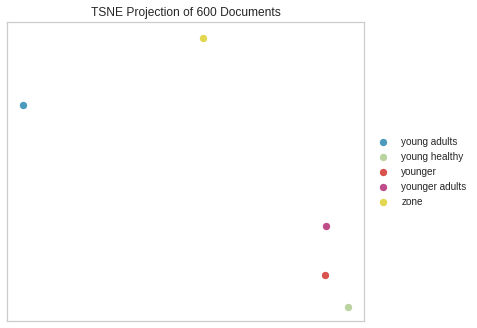

In [56]:
tsne = TSNEVisualizer()
tsne.fit(X, vocabulary[-5:])
tsne.poof()

In [0]:
from sklearn.cluster import KMeans
import numpy as np
np.random.seed(42)

In [58]:
clf = KMeans(n_clusters=50,verbose=2)
clf.fit(X)
y_kmeans =clf.predict(X)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 133763261.59596278
start iteration
done sorting
end inner loop
Iteration 1, inertia 131537128.42522989
start iteration
done sorting
end inner loop
Iteration 2, inertia 130588502.99030021
start iteration
done sorting
end inner loop
Iteration 3, inertia 130510487.26706316
start iteration
done sorting
end inner loop
Iteration 4, inertia 130507833.62983508
center shift 3.880973e+00 within tolerance 4.288188e+02
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 133938190.29950789
start iteration
done sorting
end inner loop
Iteration 1, inertia 131109242.79225624
start iteration
done sorting
end inner loop
Iteration 2, inertia 129709398.82387985
start iteration
done sorting
end inner loop
Iteration 3, inertia 129143947.2989995
start iteration
done sorting
end inner loop
Iteration 4, inertia 128906862.73219275
start iteration
done sorting
end inner loop
Iteration 5, 

Iteration 2, inertia 126044954.30951928
start iteration
done sorting
end inner loop
Iteration 3, inertia 125143024.0387639
start iteration
done sorting
end inner loop
Iteration 4, inertia 124760767.46715426
start iteration
done sorting
end inner loop
Iteration 5, inertia 124682703.25225754
start iteration
done sorting
end inner loop
Iteration 6, inertia 124670191.04241589
center shift 7.928507e+00 within tolerance 4.288188e+02
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 127730057.06732851
start iteration
done sorting
end inner loop
Iteration 1, inertia 126014656.12691894
start iteration
done sorting
end inner loop
Iteration 2, inertia 125659915.56044436
start iteration
done sorting
end inner loop
Iteration 3, inertia 125659539.59547889
center shift 2.061006e+00 within tolerance 4.288188e+02
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 131478058.74076954
start iteration
done sorting
end inner loop
I

Iteration 5, inertia 129111580.05461243
start iteration
done sorting
end inner loop
Iteration 6, inertia 129098494.87644371
center shift 8.940207e+00 within tolerance 4.288188e+02


In [59]:
!pip install -U mlxtend seaborn

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.12.0)
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.8.1)
Requirement not upgraded as not directly required: setuptools in /usr/local/lib/python3.6/dist-packages (from mlxtend) (39.2.0)
Requirement not upgraded as not directly required: scikit-learn>=0.18 in /usr/local/lib/python3.6/dist-packages (from mlxtend) (0.19.1)
Requirement not upgraded as not directly required: matplotlib>=1.5.1 in /usr/local/lib/python3.6/dist-packages (from mlxtend) (2.1.2)
Requirement not upgraded as not directly required: pandas>=0.17.1 in /usr/local/lib/python3.6/dist-packages (from mlxtend) (0.22.0)
Requirement not upgraded as not directly required: scipy>=0.17 in /usr/local/lib/python3.6/dist-packages (from mlxtend) (0.19.1)
Requirement not upgraded as not directly required: numpy>=1.10.4 in /usr/local/lib/python3.6/dist-packages (from mlxtend) (1.14.3)
Requirement not upgraded as n

In [0]:
centers = clf.cluster_centers_

In [61]:
print(centers)

[[ 5.79460045e-01  5.21061063e-01  2.89869214e-01 ...  5.88580410e-01
   4.05773466e-01  8.04086638e-01]
 [ 3.22132274e+04  3.17442984e+04  3.13852746e+04 ...  3.68951908e+04
   3.61881338e+04  3.70673757e+04]
 [-3.07800000e+04 -2.94500000e+04 -2.94500000e+04 ... -3.27680000e+04
  -3.07800000e+04 -3.27680000e+04]
 ...
 [ 5.95968734e-01  7.22399979e-01  8.09991525e-01 ... -2.92004218e-02
  -1.41602822e-02 -1.92658761e-02]
 [ 2.23102571e+00  2.92898012e+00  2.52518564e+00 ... -1.02885865e-04
   1.94978209e-05  3.71783590e-06]
 [-3.25428610e-01 -2.03444048e-01 -1.29133697e-01 ...  3.73193237e-03
  -2.72242716e-02  6.73895011e-03]]


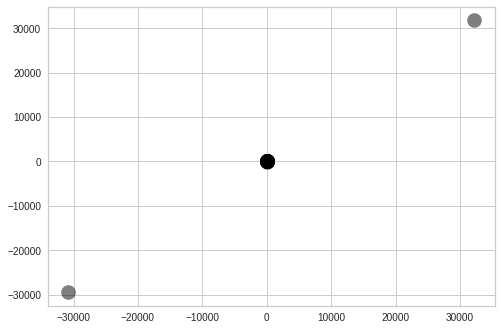

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


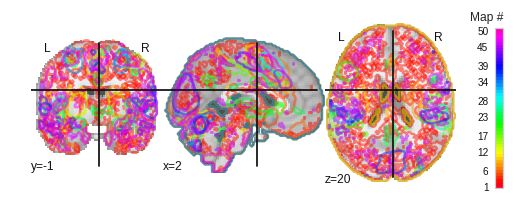

In [63]:
img = masker.inverse_transform(centers)
#print(img)
from nilearn import plotting
plotting.plot_prob_atlas(img, colorbar=True)